# Data Analysis

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Datapath = "../Data/"

# Loading the data
I use the data that has been preprocessed in "Assignment 4 ETL.ipynb".

In [3]:
df_train = pd.read_pickle("../Data/df_train.p")
df_test = pd.read_pickle("../Data/df_test.p")

Sometimes it might be more interesting to look at the combination of the train and test set

In [53]:
df_comb = pd.concat([df_train, df_test])

# Analysis
I start with a completeness check, since the "Assignment 4 ETL.ipynb" notebook already checks for that there are no missing dates. After that some descriptive analysis is performed, using a join of the train- and testdata.

In [51]:
df_train.describe()

,Demand,Temp,Rainfall,Weekday
count,1091.000000,1091.000000,1091.000000,1091.000000
mean,2.279560,111.318057,23.404216,2.997250
std,3.417942,57.161100,46.389147,1.999769
min,0.000000,-33.000000,0.000000,0.000000
25%,0.000000,66.000000,0.000000,1.000000
50%,1.000000,111.000000,1.000000,3.000000
75%,3.000000,155.000000,27.500000,5.000000
max,36.000000,264.000000,495.000000,6.000000


In [50]:
df_test.describe()

,Demand,Temp,Rainfall,Weekday
count,365.000000,365.000000,365.000000,365.000000
mean,2.046575,109.879452,25.958904,3.008219
std,2.983567,59.919559,49.918350,2.006155
min,0.000000,-38.000000,0.000000,0.000000
25%,0.000000,66.000000,0.000000,1.000000
50%,1.000000,109.000000,3.000000,3.000000
75%,3.000000,161.000000,28.000000,5.000000
max,19.000000,236.000000,393.000000,6.000000


It could be interesting to see if demand differs significantly per weekday

In [58]:
week_numb_to_name ={0: 'Monday',
                    1: 'Tuesday', 
                    2: 'Wednesday', 
                    3: 'Thursday', 
                    4: 'Friday', 
                    5: 'Saturday', 
                    6: 'Sunday'}

def weekday_plot_vals(day):
    return {
        0 : 331,
        1 : 332,
        2 : 333,
        3 : 334,
        4 : 335,
        5 : 336,
        6 : 337
    }[day]

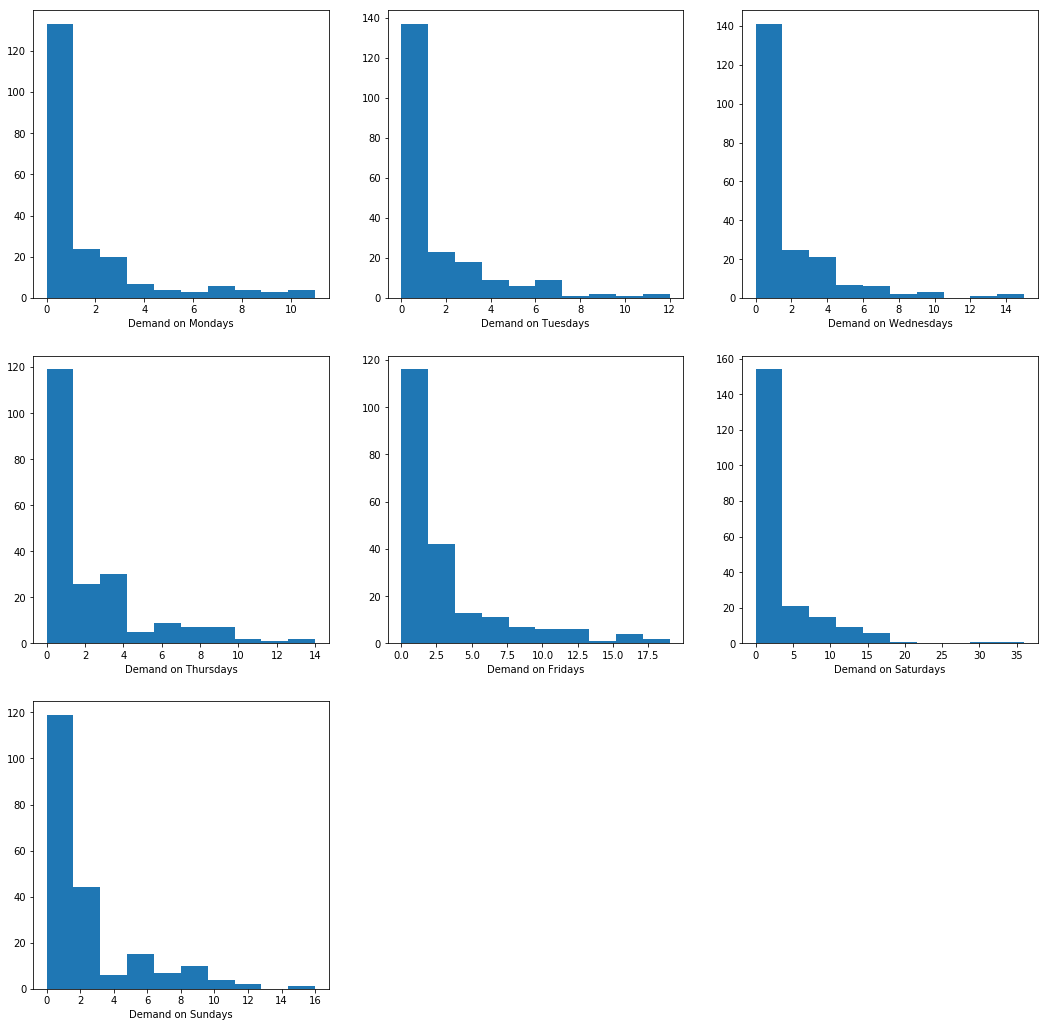

In [59]:
fig = plt.figure(figsize=(18, 18))
subfigs = []
for day in df_comb['Weekday'].unique():
    X = sorted(df_comb[df_comb['Weekday']==day]['Demand'].values)
    subfigs.append(fig.add_subplot(weekday_plot_vals(day)))
    subfigs[day].hist(X)
    subfigs[day].set_xlabel('Demand on {}s'.format(week_numb_to_name[day]))

There doesn't seem to be any really big differences in distributions, so we look at the Temperature and/or Rainfall to see there distributions.

/home/stefan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


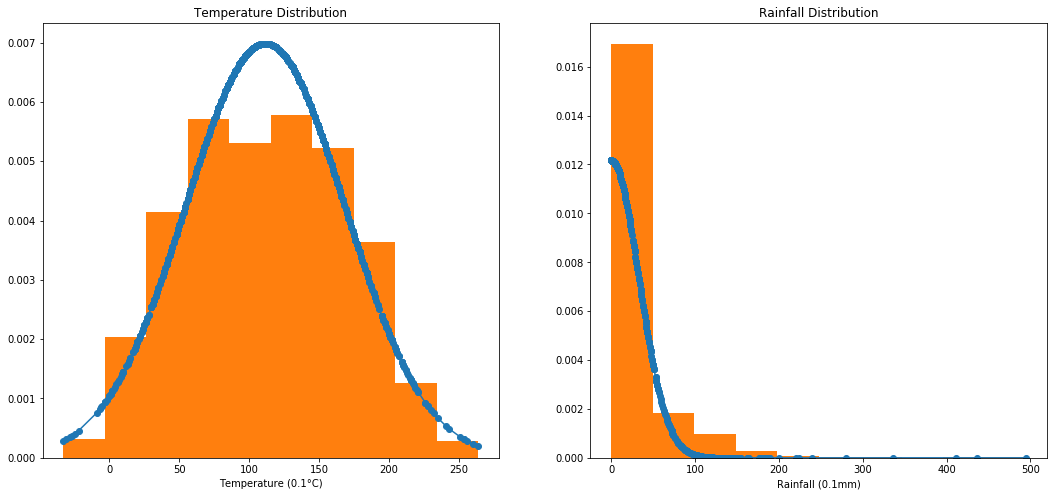

In [41]:
X1 = sorted(df_train['Temp'].values)
fit1 = stats.norm.pdf(X1, np.mean(X1), np.std(X1))

X2 = sorted(df_train['Rainfall'].values)
fit2 = stats.norm.pdf(X2, 0, 1/np.sqrt(2)*np.std(X2))

fig = plt.figure(figsize=(18, 8))
temp = fig.add_subplot(121)
rain = fig.add_subplot(122)

temp.plot(X1,fit1,'-o')
temp.hist(X1, normed=True)
temp.set_xlabel('Temperature (0.1°C)')
temp.set_title('Temperature Distribution')

rain.plot(X2,fit2,'-o')
rain.hist(X2, normed=True)
rain.set_xlabel('Rainfall (0.1mm)')
rain.set_title('Rainfall Distribution')
plt.show()

/home/stefan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


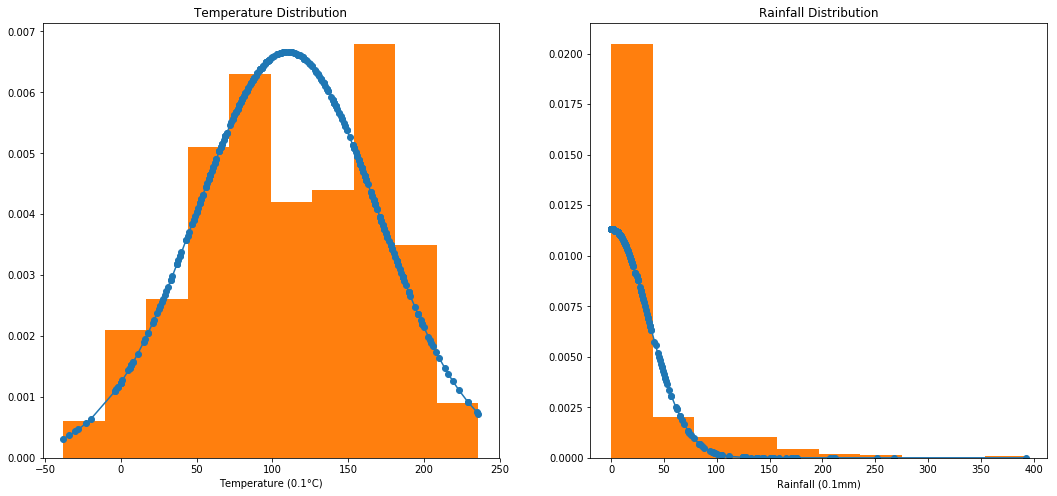

In [42]:
X1 = sorted(df_test['Temp'].values)
fit1 = stats.norm.pdf(X1, np.mean(X1), np.std(X1))

X2 = sorted(df_test['Rainfall'].values)
fit2 = stats.norm.pdf(X2, 0, 1/np.sqrt(2)*np.std(X2))

fig = plt.figure(figsize=(18, 8))
temp = fig.add_subplot(121)
rain = fig.add_subplot(122)

temp.plot(X1,fit1,'-o')
temp.hist(X1, normed=True)
temp.set_xlabel('Temperature (0.1°C)')
temp.set_title('Temperature Distribution')

rain.plot(X2,fit2,'-o')
rain.hist(X2, normed=True)
rain.set_xlabel('Rainfall (0.1mm)')
rain.set_title('Rainfall Distribution')
plt.show()

It seems that both Temperature and Rainfall are likely to be normally distributed, some tests could be run, but since this is unlikely to affect the results of our BSP models I'll leave it at this